In [124]:
## importing libraries and datasets

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

perf = pd.read_csv('StudentPerformanceFactors.csv')

In [126]:
## preview

In [127]:
perf.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [128]:
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [129]:
## renaming columns to make them more descriptive

In [130]:
mapper_columns = {"Attendance":"Attendance_Percentage"}

perf = perf.rename(
    mapper = mapper_columns,
    axis = 1
)

In [131]:
missing_values_count = perf.isnull().sum()
print(missing_values_count)

Hours_Studied                  0
Attendance_Percentage          0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [132]:
## Question 1: How does the number of hours studied affect exam scores

In [133]:
hours_v_score = perf[['Hours_Studied','Exam_Score']]

hours_v_score.head()

,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74
3,29,71
4,19,70


In [134]:
## identifying outliers

In [135]:
# IQR method for outliers
Q1 = hours_v_score[['Hours_Studied', 'Exam_Score']].quantile(0.25)
Q3 = hours_v_score[['Hours_Studied', 'Exam_Score']].quantile(0.75)
IQR = Q3 - Q1

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
hours_v_score = hours_v_score[(hours_v_score['Hours_Studied'] >= lower_bound['Hours_Studied']) & 
                               (hours_v_score['Hours_Studied'] <= upper_bound['Hours_Studied']) & 
                               (hours_v_score['Exam_Score'] >= lower_bound['Exam_Score']) & 
                               (hours_v_score['Exam_Score'] <= upper_bound['Exam_Score'])]

hours_v_score.head()


,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74
3,29,71
4,19,70


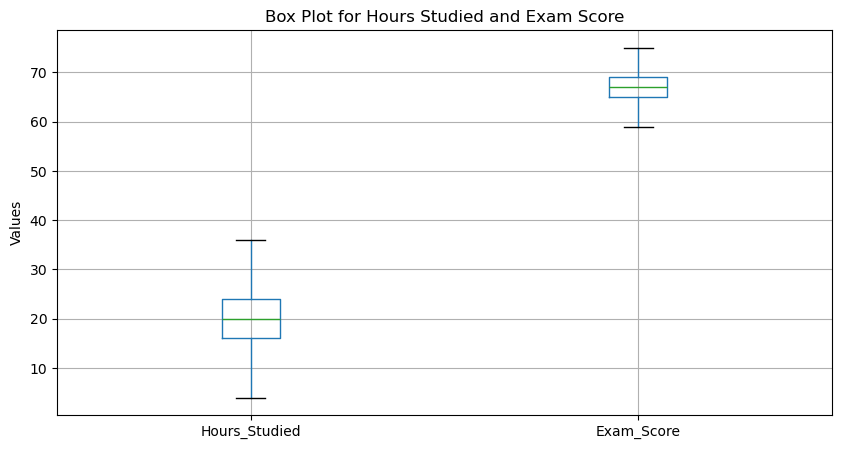

In [136]:
# Box plot for Hours_Studied and Exam_Score

plt.figure(figsize=(10, 5))
hours_v_score[['Hours_Studied', 'Exam_Score']].boxplot()
plt.title('Box Plot for Hours Studied and Exam Score')
plt.ylabel('Values')
plt.show()

In [137]:
## Exploratory Data Analysis (EDA)

In [138]:
hours_v_score.describe()

,Hours_Studied,Exam_Score
count,6473.000000,6473.000000
mean,19.972192,67.064576
std,5.778634,3.237389
min,4.000000,59.000000
25%,16.000000,65.000000
50%,20.000000,67.000000
75%,24.000000,69.000000
max,36.000000,75.000000


In [139]:
## visualization

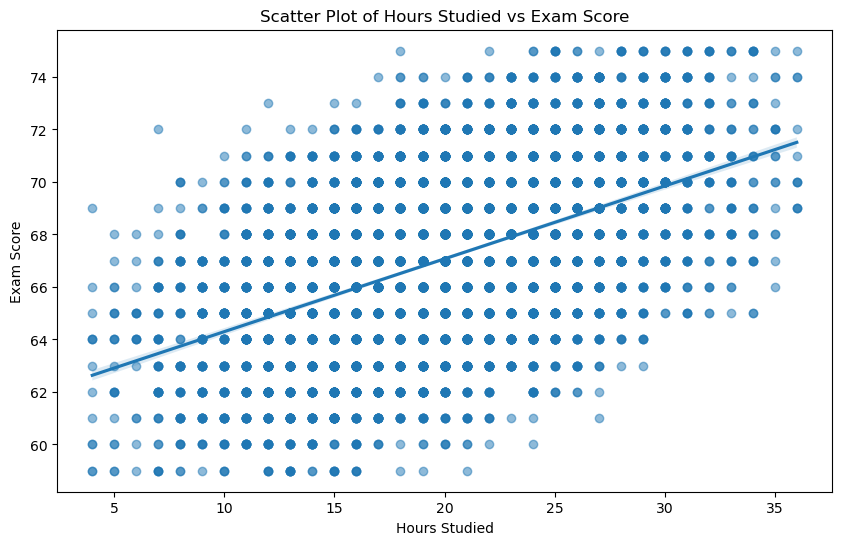

In [140]:
plt.figure(figsize=(10, 6))
sns.regplot(data=hours_v_score, x='Hours_Studied', y='Exam_Score', scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

In [141]:
## Statistical Analysis

In [142]:
correlation = hours_v_score['Hours_Studied'].corr(hours_v_score['Exam_Score'])
print(f'Pearson correlation coefficient: {correlation}')


Pearson correlation coefficient: 0.49499116907699725


## Conclusion to Question 1

Increased study hours are associated with moderately higher exam scores, as indicated by the positive correlation. However, since the correlation is not extremely high (close to 1), study hours alone do not fully explain exam performance. Other factors like quality of study, access to resources, and prior knowledge may also play roles.